In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
model = load_model('/content/drive/MyDrive/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
base_dir = '/content/drive/MyDrive/plantvillage-dataset/plantvillage dataset/color'


In [ ]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)


Found 10627 images belonging to 38 classes.


In [ ]:
# Step 1: Make predictions on the validation/test set
y_pred_prob = model.predict(validation_generator, steps=validation_generator.samples // batch_size)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

332/332 ━━━━━━━━━━━━━━━━━━━━ 331s 995ms/step


In [ ]:
# Step 1: Make predictions on the validation/test set
y_pred_prob = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
# Added +1 to the steps to ensure all samples are included in the prediction

y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# ... (rest of your code) ...

# Before calculating the confusion matrix:
y_pred = y_pred[:len(y_true)]  # Trim y_pred to match the length of y_true
cm = confusion_matrix(y_true, y_pred)

333/333 ━━━━━━━━━━━━━━━━━━━━ 327s 978ms/step


In [ ]:
# Get true labels
y_true = validation_generator.classes[:len(y_pred)]  # Slice to match y_pred length

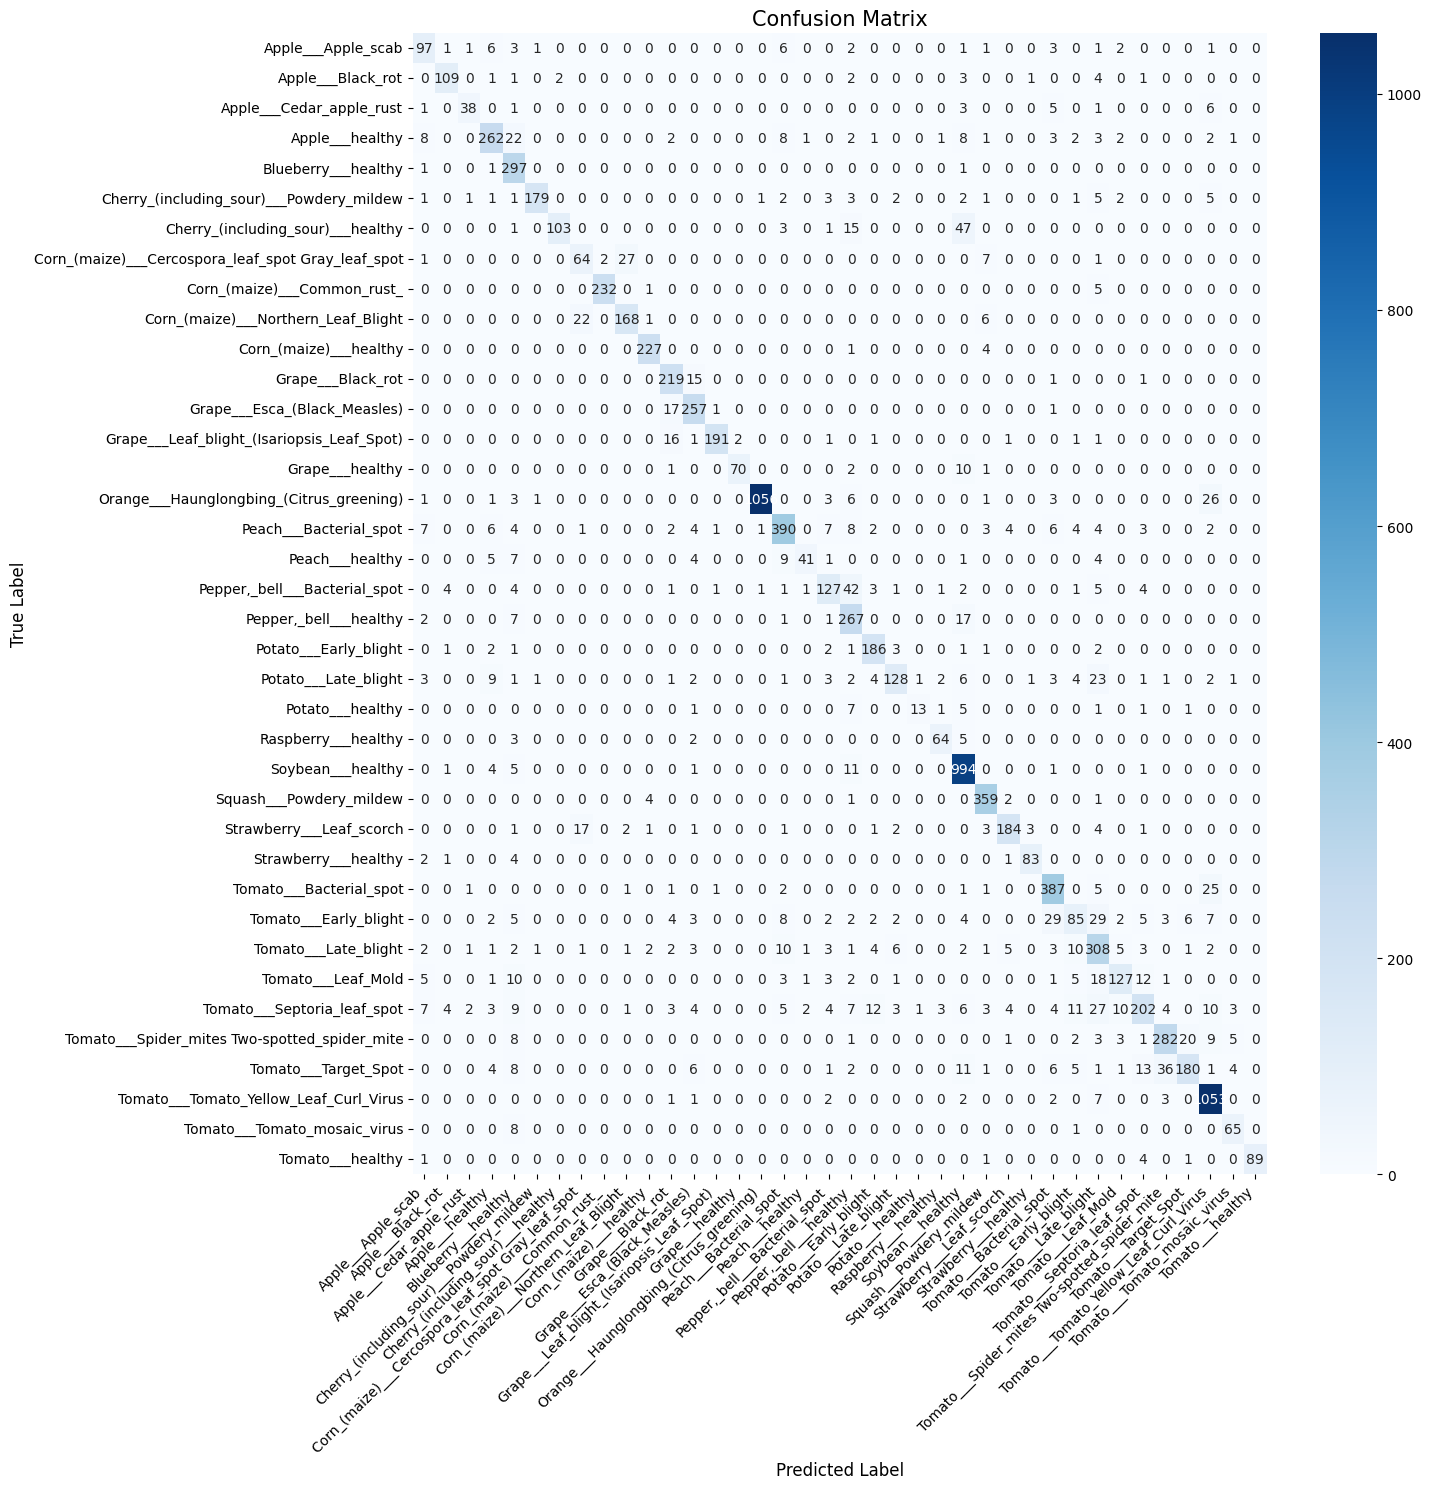

In [ ]:
# Plot confusion matrix with better formatting
plt.figure(figsize=(15, 15))  # Increase figure size for clarity
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(validation_generator.class_indices.keys()),
            yticklabels=list(validation_generator.class_indices.keys()),
            cbar=True)

# Rotate x and y-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add labels and title
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.tight_layout()  # Adjust layout to avoid clipping labels

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys()))

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.70      0.77      0.73       126
                                 Apple___Black_rot       0.90      0.88      0.89       124
                          Apple___Cedar_apple_rust       0.86      0.69      0.77        55
                                   Apple___healthy       0.85      0.80      0.82       329
                               Blueberry___healthy       0.71      0.99      0.83       300
          Cherry_(including_sour)___Powdery_mildew       0.98      0.85      0.91       210
                 Cherry_(including_sour)___healthy       0.98      0.61      0.75       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.61      0.63      0.62       102
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       238
               Corn_(maize)___Northern_Leaf_Blight      